In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 300)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [7]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

2

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/10".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/10
number of class1:973
number of class2:644

 ****** Running generation 0 ****** 

Population's average fitness: 0.47974 stdev: 0.09125
Best fitness: 0.70563 - size: (2, 13) - species 3 - id 23
Average adjusted fitness: 0.204
Mean genetic distance 2.906, standard deviation 0.490
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 11.325 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52942 stdev: 0.09599
Best fitness: 0.74397 - size: (2, 14) - species 3 - id 380
Average adjusted fitness: 0.199
Mean genetic distance 3.006, standard deviation 0.492
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 11.893 sec (11.609 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55818 stdev: 0.09667
Best fitness: 0.74954 - size: (2, 15) - species 1 - id 515
Average adjusted fitness: 0.253
Mean genetic distance 3.088, standard deviation 0.495
Population of 200 members in 33 species


Population's average fitness: 0.61591 stdev: 0.10566
Best fitness: 0.78726 - size: (5, 19) - species 9 - id 1326
Average adjusted fitness: 0.290
Mean genetic distance 3.151, standard deviation 0.479
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 18.175 sec (17.168 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62816 stdev: 0.10174
Best fitness: 0.78726 - size: (5, 19) - species 9 - id 1326
Average adjusted fitness: 0.321
Mean genetic distance 3.168, standard deviation 0.489
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 18.052 sec (17.407 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62570 stdev: 0.10330
Best fitness: 0.78726 - size: (5, 19) - species 9 - id 1326
Average adjusted fitness: 0.329
Mean genetic distance 3.172, standard deviation 0.488
Population of 195 members in 33 species
Total extinctions: 0
Generation time: 17.921 sec (17.536 average)

 ***

Population's average fitness: 0.63443 stdev: 0.11575
Best fitness: 0.81014 - size: (6, 22) - species 49 - id 5851
Average adjusted fitness: 0.304
Mean genetic distance 3.246, standard deviation 0.541
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 20.639 sec (20.174 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.63492 stdev: 0.11804
Best fitness: 0.81014 - size: (6, 22) - species 49 - id 5851
Average adjusted fitness: 0.325
Mean genetic distance 3.267, standard deviation 0.537
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 19.861 sec (20.219 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.63404 stdev: 0.11966
Best fitness: 0.81200 - size: (12, 34) - species 31 - id 7053
Average adjusted fitness: 0.253
Mean genetic distance 3.234, standard deviation 0.546
Population of 194 members in 21 species
Total extinctions: 0
Generation time: 19.818 sec (20.217 average)



Population's average fitness: 0.65306 stdev: 0.10218
Best fitness: 0.81633 - size: (14, 39) - species 31 - id 10498
Average adjusted fitness: 0.334
Mean genetic distance 3.068, standard deviation 0.564
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 21.023 sec (21.027 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.64550 stdev: 0.10532
Best fitness: 0.81633 - size: (14, 39) - species 31 - id 10498
Average adjusted fitness: 0.313
Mean genetic distance 3.053, standard deviation 0.572
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 21.056 sec (20.989 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.64304 stdev: 0.11551
Best fitness: 0.81633 - size: (14, 39) - species 31 - id 10498
Average adjusted fitness: 0.323
Mean genetic distance 3.039, standard deviation 0.565
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 21.697 sec (21.029 avera

Population's average fitness: 0.64971 stdev: 0.12313
Best fitness: 0.82931 - size: (16, 39) - species 25 - id 14649
Average adjusted fitness: 0.283
Mean genetic distance 3.197, standard deviation 0.564
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 23.590 sec (22.202 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65938 stdev: 0.11785
Best fitness: 0.82931 - size: (16, 39) - species 25 - id 14649
Average adjusted fitness: 0.327
Mean genetic distance 3.210, standard deviation 0.548
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 24.574 sec (22.473 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.64003 stdev: 0.12554
Best fitness: 0.83117 - size: (18, 44) - species 25 - id 14982
Average adjusted fitness: 0.323
Mean genetic distance 3.192, standard deviation 0.547
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 22.884 sec (22.587 avera

Population's average fitness: 0.64686 stdev: 0.12011
Best fitness: 0.83673 - size: (18, 45) - species 25 - id 18179
Average adjusted fitness: 0.247
Mean genetic distance 3.275, standard deviation 0.596
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 28.511 sec (26.890 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.63436 stdev: 0.12580
Best fitness: 0.83673 - size: (18, 45) - species 25 - id 18179
Average adjusted fitness: 0.262
Mean genetic distance 3.258, standard deviation 0.597
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 28.504 sec (27.200 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.64818 stdev: 0.11184
Best fitness: 0.83673 - size: (18, 45) - species 25 - id 18179
Average adjusted fitness: 0.285
Mean genetic distance 3.274, standard deviation 0.584
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 27.791 sec (27.432 ave

Population's average fitness: 0.65535 stdev: 0.11901
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.261
Mean genetic distance 3.290, standard deviation 0.593
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 32.533 sec (31.550 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.64810 stdev: 0.12668
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.298
Mean genetic distance 3.289, standard deviation 0.591
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 32.725 sec (31.849 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.66600 stdev: 0.11339
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.265
Mean genetic distance 3.283, standard deviation 0.594
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 32.977 sec (32.053 ave

Population's average fitness: 0.65130 stdev: 0.11665
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.306
Mean genetic distance 3.216, standard deviation 0.641
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 34.828 sec (34.423 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.66206 stdev: 0.11820
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.279
Mean genetic distance 3.239, standard deviation 0.625
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 34.516 sec (34.429 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.64022 stdev: 0.12370
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.290
Mean genetic distance 3.231, standard deviation 0.621
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 35.409 sec (34.513 ave

Population's average fitness: 0.65582 stdev: 0.12057
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.267
Mean genetic distance 3.151, standard deviation 0.628
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 37.600 sec (36.719 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.66387 stdev: 0.10761
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.306
Mean genetic distance 3.153, standard deviation 0.632
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 38.797 sec (36.965 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.64912 stdev: 0.12887
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.268
Mean genetic distance 3.152, standard deviation 0.624
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 38.360 sec (37.119 ave

Population's average fitness: 0.66008 stdev: 0.13303
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.292
Mean genetic distance 2.985, standard deviation 0.684
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 40.020 sec (39.278 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.67300 stdev: 0.12834
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.362
Mean genetic distance 2.993, standard deviation 0.684
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 37.910 sec (38.978 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.64791 stdev: 0.14251
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.299
Mean genetic distance 3.014, standard deviation 0.714
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 37.952 sec (38.704 ave

Population's average fitness: 0.66846 stdev: 0.12927
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.376
Mean genetic distance 3.066, standard deviation 0.663
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 32.649 sec (32.538 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.65979 stdev: 0.12935
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.274
Mean genetic distance 3.049, standard deviation 0.677
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 33.128 sec (32.646 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.66451 stdev: 0.13427
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.310
Mean genetic distance 3.068, standard deviation 0.656
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 32.708 sec (32.712 ave

Population's average fitness: 0.67472 stdev: 0.12946
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.321
Mean genetic distance 2.892, standard deviation 0.529
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 33.602 sec (32.709 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.69137 stdev: 0.12877
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.317
Mean genetic distance 2.951, standard deviation 0.545
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 32.726 sec (32.781 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.67394 stdev: 0.14546
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.349
Mean genetic distance 2.926, standard deviation 0.548
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 32.225 sec (32.754 ave

Population's average fitness: 0.65804 stdev: 0.14290
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.364
Mean genetic distance 2.955, standard deviation 0.497
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 27.783 sec (29.012 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.66796 stdev: 0.13376
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.426
Mean genetic distance 2.931, standard deviation 0.510
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 28.255 sec (28.656 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.64933 stdev: 0.15166
Best fitness: 0.84416 - size: (23, 52) - species 76 - id 19356
Average adjusted fitness: 0.368
Mean genetic distance 2.926, standard deviation 0.527
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 27.871 sec (28.208 ave

Population's average fitness: 0.72613 stdev: 0.17432
Best fitness: 0.85714 - size: (4, 18) - species 3 - id 1305
Average adjusted fitness: 0.501
Mean genetic distance 3.123, standard deviation 0.489
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 13.459 sec (12.758 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71688 stdev: 0.18793
Best fitness: 0.85714 - size: (4, 18) - species 3 - id 1305
Average adjusted fitness: 0.514
Mean genetic distance 3.151, standard deviation 0.490
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 13.098 sec (12.859 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70870 stdev: 0.19960
Best fitness: 0.86395 - size: (4, 18) - species 35 - id 2066
Average adjusted fitness: 0.494
Mean genetic distance 3.131, standard deviation 0.492
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 13.030 sec (12.922 average)

 **

Population's average fitness: 0.73394 stdev: 0.17423
Best fitness: 0.89487 - size: (4, 19) - species 35 - id 3171
Average adjusted fitness: 0.524
Mean genetic distance 3.301, standard deviation 0.533
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 11.896 sec (11.765 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.73183 stdev: 0.17474
Best fitness: 0.89487 - size: (4, 19) - species 35 - id 3171
Average adjusted fitness: 0.515
Mean genetic distance 3.291, standard deviation 0.544
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 11.924 sec (11.836 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.71369 stdev: 0.19749
Best fitness: 0.89487 - size: (4, 19) - species 35 - id 3171
Average adjusted fitness: 0.504
Mean genetic distance 3.310, standard deviation 0.541
Population of 197 members in 24 species
Total extinctions: 0
Generation time: 12.395 sec (11.913 average)

 

Population's average fitness: 0.72674 stdev: 0.16236
Best fitness: 0.90724 - size: (6, 23) - species 35 - id 5494
Average adjusted fitness: 0.511
Mean genetic distance 3.294, standard deviation 0.570
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 10.177 sec (9.897 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.69804 stdev: 0.19307
Best fitness: 0.90724 - size: (6, 23) - species 35 - id 5494
Average adjusted fitness: 0.473
Mean genetic distance 3.287, standard deviation 0.558
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 10.188 sec (9.939 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.70871 stdev: 0.19032
Best fitness: 0.90724 - size: (6, 23) - species 35 - id 5494
Average adjusted fitness: 0.498
Mean genetic distance 3.310, standard deviation 0.562
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 10.612 sec (10.016 average)

 **

Population's average fitness: 0.74714 stdev: 0.17211
Best fitness: 0.90724 - size: (6, 23) - species 35 - id 5494
Average adjusted fitness: 0.549
Mean genetic distance 3.270, standard deviation 0.571
Population of 205 members in 20 species
Total extinctions: 0
Generation time: 11.876 sec (11.778 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.71856 stdev: 0.20748
Best fitness: 0.90724 - size: (6, 23) - species 35 - id 5494
Average adjusted fitness: 0.528
Mean genetic distance 3.294, standard deviation 0.577
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 12.168 sec (11.810 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.71807 stdev: 0.20223
Best fitness: 0.90724 - size: (6, 23) - species 35 - id 5494
Average adjusted fitness: 0.520
Mean genetic distance 3.306, standard deviation 0.573
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 11.900 sec (11.795 average)

 

Population's average fitness: 0.69386 stdev: 0.22411
Best fitness: 0.91837 - size: (7, 24) - species 35 - id 14113
Average adjusted fitness: 0.499
Mean genetic distance 3.164, standard deviation 0.583
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 14.463 sec (14.249 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.67923 stdev: 0.23457
Best fitness: 0.91837 - size: (7, 24) - species 35 - id 14113
Average adjusted fitness: 0.476
Mean genetic distance 3.170, standard deviation 0.585
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 15.243 sec (14.399 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.71481 stdev: 0.21487
Best fitness: 0.91837 - size: (7, 24) - species 35 - id 14113
Average adjusted fitness: 0.515
Mean genetic distance 3.175, standard deviation 0.601
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 14.993 sec (14.485 averag

Population's average fitness: 0.68054 stdev: 0.24117
Best fitness: 0.91837 - size: (7, 24) - species 35 - id 14113
Average adjusted fitness: 0.457
Mean genetic distance 2.995, standard deviation 0.549
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 13.168 sec (13.239 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.69513 stdev: 0.22698
Best fitness: 0.91837 - size: (7, 24) - species 35 - id 14113
Average adjusted fitness: 0.503
Mean genetic distance 2.995, standard deviation 0.566
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 13.294 sec (13.211 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.70249 stdev: 0.22203
Best fitness: 0.91837 - size: (7, 24) - species 35 - id 14113
Average adjusted fitness: 0.497
Mean genetic distance 2.989, standard deviation 0.570
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 13.399 sec (13.183 averag

Population's average fitness: 0.73217 stdev: 0.19607
Best fitness: 0.92764 - size: (14, 33) - species 94 - id 24841
Average adjusted fitness: 0.535
Mean genetic distance 2.939, standard deviation 0.587
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 13.500 sec (13.494 average)

 ****** Running generation 157 ****** 

Population's average fitness: 0.69630 stdev: 0.23077
Best fitness: 0.92764 - size: (14, 33) - species 94 - id 24841
Average adjusted fitness: 0.511
Mean genetic distance 2.939, standard deviation 0.595
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 13.749 sec (13.542 average)

 ****** Running generation 158 ****** 

Population's average fitness: 0.71846 stdev: 0.21970
Best fitness: 0.92764 - size: (14, 33) - species 94 - id 24841
Average adjusted fitness: 0.535
Mean genetic distance 2.999, standard deviation 0.582
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 14.018 sec (13.642 ave

Population's average fitness: 0.77247 stdev: 0.18544
Best fitness: 0.92764 - size: (14, 33) - species 94 - id 24841
Average adjusted fitness: 0.582
Mean genetic distance 3.066, standard deviation 0.564
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 14.289 sec (14.113 average)

 ****** Running generation 181 ****** 

Population's average fitness: 0.76621 stdev: 0.19892
Best fitness: 0.92764 - size: (14, 33) - species 94 - id 24841
Average adjusted fitness: 0.579
Mean genetic distance 3.110, standard deviation 0.548
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 13.620 sec (14.062 average)

 ****** Running generation 182 ****** 

Population's average fitness: 0.78325 stdev: 0.17962
Best fitness: 0.92764 - size: (14, 33) - species 94 - id 24841
Average adjusted fitness: 0.632
Mean genetic distance 3.150, standard deviation 0.534
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 14.937 sec (14.132 ave

Population's average fitness: 0.76003 stdev: 0.20439
Best fitness: 0.93692 - size: (25, 55) - species 108 - id 33036
Average adjusted fitness: 0.514
Mean genetic distance 3.012, standard deviation 0.564
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 15.376 sec (14.954 average)

 ****** Running generation 205 ****** 

Population's average fitness: 0.75847 stdev: 0.21410
Best fitness: 0.93692 - size: (25, 55) - species 108 - id 33036
Average adjusted fitness: 0.550
Mean genetic distance 3.028, standard deviation 0.528
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 15.889 sec (15.015 average)

 ****** Running generation 206 ****** 

Population's average fitness: 0.73502 stdev: 0.22514
Best fitness: 0.93692 - size: (25, 55) - species 108 - id 33036
Average adjusted fitness: 0.544
Mean genetic distance 3.009, standard deviation 0.556
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 15.461 sec (15.111 

Mean genetic distance 3.090, standard deviation 0.529
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 14.090 sec (14.114 average)

 ****** Running generation 228 ****** 

Population's average fitness: 0.76425 stdev: 0.20825
Best fitness: 0.93692 - size: (25, 55) - species 108 - id 33036
Average adjusted fitness: 0.516
Mean genetic distance 3.120, standard deviation 0.529
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 14.110 sec (14.111 average)

 ****** Running generation 229 ****** 

Population's average fitness: 0.78440 stdev: 0.17279
Best fitness: 0.93692 - size: (25, 55) - species 108 - id 33036
Average adjusted fitness: 0.543
Mean genetic distance 3.116, standard deviation 0.497
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 14.703 sec (14.145 average)

 ****** Running generation 230 ****** 

Population's average fitness: 0.75306 stdev: 0.20985
Best fitness: 0.93692 - size: (25, 55) - speci

Population's average fitness: 0.71575 stdev: 0.24292
Best fitness: 0.93692 - size: (25, 55) - species 108 - id 33036
Average adjusted fitness: 0.515
Mean genetic distance 3.026, standard deviation 0.534
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 15.296 sec (14.372 average)

 ****** Running generation 252 ****** 

Population's average fitness: 0.75964 stdev: 0.20067
Best fitness: 0.93692 - size: (25, 55) - species 108 - id 33036
Average adjusted fitness: 0.567
Mean genetic distance 3.027, standard deviation 0.547
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 15.722 sec (14.495 average)

 ****** Running generation 253 ****** 

Population's average fitness: 0.77558 stdev: 0.18747
Best fitness: 0.93692 - size: (25, 55) - species 108 - id 33036
Average adjusted fitness: 0.590
Mean genetic distance 3.044, standard deviation 0.553
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 16.941 sec (14.697 

Mean genetic distance 2.969, standard deviation 0.554
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 16.532 sec (16.849 average)

 ****** Running generation 275 ****** 

Population's average fitness: 0.78581 stdev: 0.17957
Best fitness: 0.93692 - size: (25, 55) - species 108 - id 33036
Average adjusted fitness: 0.586
Mean genetic distance 2.962, standard deviation 0.534
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 16.050 sec (16.784 average)

 ****** Running generation 276 ****** 

Population's average fitness: 0.81285 stdev: 0.15359
Best fitness: 0.93692 - size: (25, 55) - species 108 - id 33036
Average adjusted fitness: 0.618
Mean genetic distance 2.967, standard deviation 0.516
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 15.853 sec (16.683 average)

 ****** Running generation 277 ****** 

Population's average fitness: 0.80182 stdev: 0.17201
Best fitness: 0.93692 - size: (25, 55) - speci

Population's average fitness: 0.78027 stdev: 0.18135
Best fitness: 0.93692 - size: (25, 55) - species 108 - id 33036
Average adjusted fitness: 0.588
Mean genetic distance 2.823, standard deviation 0.492
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 16.466 sec (15.455 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.79565 stdev: 0.18539
Best fitness: 0.93692 - size: (25, 55) - species 108 - id 33036
Average adjusted fitness: 0.600
Mean genetic distance 2.834, standard deviation 0.480
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 16.319 sec (15.608 average)
running:2/10
number of class1:1134
number of class2:483

 ****** Running generation 0 ****** 

Population's average fitness: 0.46836 stdev: 0.15831
Best fitness: 0.81200 - size: (2, 13) - species 4 - id 122
Average adjusted fitness: 0.222
Mean genetic distance 2.882, standard deviation 0.470
Population of 201 members in 18 species
Total ex

Population's average fitness: 0.66327 stdev: 0.15950
Best fitness: 0.84663 - size: (6, 21) - species 31 - id 3280
Average adjusted fitness: 0.395
Mean genetic distance 3.218, standard deviation 0.539
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 9.647 sec (9.320 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.66640 stdev: 0.15842
Best fitness: 0.85034 - size: (6, 22) - species 31 - id 3590
Average adjusted fitness: 0.363
Mean genetic distance 3.225, standard deviation 0.528
Population of 205 members in 25 species
Total extinctions: 0
Generation time: 9.746 sec (9.374 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.67810 stdev: 0.15606
Best fitness: 0.85034 - size: (6, 22) - species 31 - id 3590
Average adjusted fitness: 0.394
Mean genetic distance 3.225, standard deviation 0.533
Population of 206 members in 25 species
Total extinctions: 0
Generation time: 9.839 sec (9.453 average)

 ******

Population's average fitness: 0.68088 stdev: 0.16866
Best fitness: 0.86333 - size: (5, 16) - species 34 - id 7265
Average adjusted fitness: 0.385
Mean genetic distance 3.222, standard deviation 0.546
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 9.976 sec (9.787 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.67744 stdev: 0.17041
Best fitness: 0.87384 - size: (6, 18) - species 34 - id 7432
Average adjusted fitness: 0.375
Mean genetic distance 3.249, standard deviation 0.554
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 10.092 sec (9.824 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.68586 stdev: 0.15841
Best fitness: 0.87384 - size: (6, 18) - species 34 - id 7432
Average adjusted fitness: 0.394
Mean genetic distance 3.243, standard deviation 0.554
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 9.806 sec (9.824 average)

 *****

Population's average fitness: 0.68529 stdev: 0.16564
Best fitness: 0.87384 - size: (6, 18) - species 34 - id 7432
Average adjusted fitness: 0.361
Mean genetic distance 3.360, standard deviation 0.576
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 11.074 sec (10.988 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.66373 stdev: 0.17420
Best fitness: 0.87384 - size: (6, 18) - species 34 - id 7432
Average adjusted fitness: 0.409
Mean genetic distance 3.342, standard deviation 0.578
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 11.419 sec (11.055 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.68484 stdev: 0.16707
Best fitness: 0.87384 - size: (6, 18) - species 34 - id 7432
Average adjusted fitness: 0.413
Mean genetic distance 3.309, standard deviation 0.594
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 10.826 sec (11.045 average)

 

Population's average fitness: 0.69006 stdev: 0.15844
Best fitness: 0.87384 - size: (6, 18) - species 34 - id 7432
Average adjusted fitness: 0.390
Mean genetic distance 3.014, standard deviation 0.621
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 12.174 sec (12.553 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.71388 stdev: 0.12888
Best fitness: 0.87384 - size: (6, 18) - species 34 - id 7432
Average adjusted fitness: 0.415
Mean genetic distance 3.037, standard deviation 0.586
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 12.883 sec (12.634 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.67703 stdev: 0.15926
Best fitness: 0.87384 - size: (6, 18) - species 34 - id 7432
Average adjusted fitness: 0.381
Mean genetic distance 3.015, standard deviation 0.600
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 12.969 sec (12.668 average)

 

Population's average fitness: 0.68354 stdev: 0.17663
Best fitness: 0.87384 - size: (6, 18) - species 34 - id 7432
Average adjusted fitness: 0.430
Mean genetic distance 2.977, standard deviation 0.535
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 13.066 sec (12.803 average)

 ****** Running generation 119 ****** 

Population's average fitness: 0.67988 stdev: 0.17632
Best fitness: 0.87384 - size: (6, 18) - species 34 - id 7432
Average adjusted fitness: 0.368
Mean genetic distance 3.007, standard deviation 0.537
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 13.098 sec (12.833 average)

 ****** Running generation 120 ****** 

Population's average fitness: 0.70293 stdev: 0.16229
Best fitness: 0.87384 - size: (6, 18) - species 34 - id 7432
Average adjusted fitness: 0.400
Mean genetic distance 3.015, standard deviation 0.540
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 13.573 sec (12.963 average)


Population's average fitness: 0.65070 stdev: 0.18310
Best fitness: 0.87817 - size: (11, 32) - species 53 - id 22024
Average adjusted fitness: 0.450
Mean genetic distance 2.880, standard deviation 0.478
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 13.180 sec (13.370 average)

 ****** Running generation 143 ****** 

Population's average fitness: 0.68063 stdev: 0.16042
Best fitness: 0.87817 - size: (11, 32) - species 53 - id 22024
Average adjusted fitness: 0.431
Mean genetic distance 2.906, standard deviation 0.484
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 13.115 sec (13.329 average)

 ****** Running generation 144 ****** 

Population's average fitness: 0.66622 stdev: 0.17538
Best fitness: 0.87817 - size: (11, 32) - species 53 - id 22024
Average adjusted fitness: 0.368
Mean genetic distance 2.926, standard deviation 0.491
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 13.127 sec (13.329 ave

Population's average fitness: 0.66849 stdev: 0.18036
Best fitness: 0.88188 - size: (9, 26) - species 34 - id 24476
Average adjusted fitness: 0.428
Mean genetic distance 2.926, standard deviation 0.485
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 16.231 sec (14.714 average)

 ****** Running generation 167 ****** 

Population's average fitness: 0.66880 stdev: 0.17520
Best fitness: 0.88188 - size: (9, 26) - species 34 - id 24476
Average adjusted fitness: 0.447
Mean genetic distance 2.927, standard deviation 0.507
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 15.196 sec (14.876 average)

 ****** Running generation 168 ****** 

Population's average fitness: 0.67101 stdev: 0.17291
Best fitness: 0.88188 - size: (9, 26) - species 34 - id 24476
Average adjusted fitness: 0.374
Mean genetic distance 2.948, standard deviation 0.486
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 15.094 sec (15.006 averag

Population's average fitness: 0.68805 stdev: 0.17787
Best fitness: 0.88188 - size: (9, 26) - species 34 - id 24476
Average adjusted fitness: 0.414
Mean genetic distance 2.980, standard deviation 0.491
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 14.530 sec (14.955 average)

 ****** Running generation 191 ****** 

Population's average fitness: 0.70744 stdev: 0.16436
Best fitness: 0.88188 - size: (9, 26) - species 34 - id 24476
Average adjusted fitness: 0.394
Mean genetic distance 2.976, standard deviation 0.487
Population of 205 members in 17 species
Total extinctions: 0
Generation time: 15.406 sec (15.031 average)

 ****** Running generation 192 ****** 

Population's average fitness: 0.69644 stdev: 0.17407
Best fitness: 0.88188 - size: (9, 26) - species 34 - id 24476
Average adjusted fitness: 0.427
Mean genetic distance 2.976, standard deviation 0.486
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 15.832 sec (15.087 averag

Population's average fitness: 0.68287 stdev: 0.18016
Best fitness: 0.88497 - size: (9, 27) - species 34 - id 32566
Average adjusted fitness: 0.442
Mean genetic distance 2.934, standard deviation 0.484
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 14.359 sec (13.936 average)

 ****** Running generation 215 ****** 

Population's average fitness: 0.65897 stdev: 0.20142
Best fitness: 0.88868 - size: (24, 55) - species 99 - id 35818
Average adjusted fitness: 0.386
Mean genetic distance 2.950, standard deviation 0.515
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 14.492 sec (14.025 average)

 ****** Running generation 216 ****** 

Population's average fitness: 0.68529 stdev: 0.18525
Best fitness: 0.88868 - size: (24, 55) - species 99 - id 35818
Average adjusted fitness: 0.377
Mean genetic distance 2.968, standard deviation 0.518
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 14.516 sec (14.115 aver

Population's average fitness: 0.70581 stdev: 0.18098
Best fitness: 0.88868 - size: (24, 55) - species 99 - id 35818
Average adjusted fitness: 0.414
Mean genetic distance 2.997, standard deviation 0.560
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 16.487 sec (17.600 average)

 ****** Running generation 239 ****** 

Population's average fitness: 0.71653 stdev: 0.17325
Best fitness: 0.88868 - size: (24, 55) - species 99 - id 35818
Average adjusted fitness: 0.477
Mean genetic distance 2.992, standard deviation 0.551
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 16.728 sec (17.345 average)

 ****** Running generation 240 ****** 

Population's average fitness: 0.71315 stdev: 0.17939
Best fitness: 0.88868 - size: (24, 55) - species 99 - id 35818
Average adjusted fitness: 0.419
Mean genetic distance 2.987, standard deviation 0.561
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 17.292 sec (17.307 ave

Population's average fitness: 0.70786 stdev: 0.17524
Best fitness: 0.88868 - size: (24, 55) - species 99 - id 35818
Average adjusted fitness: 0.424
Mean genetic distance 2.983, standard deviation 0.568
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 14.945 sec (16.317 average)

 ****** Running generation 263 ****** 

Population's average fitness: 0.67230 stdev: 0.19757
Best fitness: 0.88868 - size: (24, 55) - species 99 - id 35818
Average adjusted fitness: 0.352
Mean genetic distance 2.983, standard deviation 0.604
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 15.522 sec (16.228 average)

 ****** Running generation 264 ****** 

Population's average fitness: 0.66918 stdev: 0.20890
Best fitness: 0.88868 - size: (24, 55) - species 99 - id 35818
Average adjusted fitness: 0.329
Mean genetic distance 2.966, standard deviation 0.618
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 15.450 sec (16.070 avera

Population's average fitness: 0.67379 stdev: 0.20013
Best fitness: 0.88930 - size: (27, 58) - species 127 - id 47384
Average adjusted fitness: 0.389
Mean genetic distance 2.964, standard deviation 0.519
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 15.178 sec (14.523 average)

 ****** Running generation 287 ****** 

Population's average fitness: 0.68766 stdev: 0.19015
Best fitness: 0.88930 - size: (27, 58) - species 131 - id 47384
Average adjusted fitness: 0.393
Mean genetic distance 2.971, standard deviation 0.517
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 14.759 sec (14.597 average)

 ****** Running generation 288 ****** 

Population's average fitness: 0.67490 stdev: 0.19921
Best fitness: 0.88930 - size: (27, 58) - species 131 - id 47384
Average adjusted fitness: 0.418
Mean genetic distance 2.953, standard deviation 0.529
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 15.336 sec (14.748 

Population's average fitness: 0.65294 stdev: 0.11976
Best fitness: 0.80148 - size: (4, 18) - species 26 - id 1437
Average adjusted fitness: 0.375
Mean genetic distance 3.056, standard deviation 0.495
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.790 sec (7.971 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65322 stdev: 0.11702
Best fitness: 0.80148 - size: (4, 18) - species 26 - id 1437
Average adjusted fitness: 0.353
Mean genetic distance 3.088, standard deviation 0.486
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 8.608 sec (8.131 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65340 stdev: 0.12165
Best fitness: 0.80148 - size: (4, 18) - species 26 - id 1437
Average adjusted fitness: 0.375
Mean genetic distance 3.107, standard deviation 0.484
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 8.464 sec (8.226 average)

 ******

Population's average fitness: 0.65423 stdev: 0.12749
Best fitness: 0.83612 - size: (9, 27) - species 3 - id 3913
Average adjusted fitness: 0.370
Mean genetic distance 3.231, standard deviation 0.531
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 9.512 sec (9.217 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.65637 stdev: 0.13069
Best fitness: 0.83612 - size: (9, 27) - species 3 - id 3913
Average adjusted fitness: 0.359
Mean genetic distance 3.237, standard deviation 0.535
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 9.626 sec (9.245 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.65710 stdev: 0.13427
Best fitness: 0.83612 - size: (9, 27) - species 3 - id 3913
Average adjusted fitness: 0.360
Mean genetic distance 3.240, standard deviation 0.523
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 9.916 sec (9.304 average)

 ****** Ru

Population's average fitness: 0.65128 stdev: 0.14020
Best fitness: 0.84972 - size: (10, 28) - species 3 - id 7331
Average adjusted fitness: 0.358
Mean genetic distance 3.197, standard deviation 0.536
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 10.440 sec (10.506 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.65632 stdev: 0.13727
Best fitness: 0.84972 - size: (10, 28) - species 3 - id 7331
Average adjusted fitness: 0.362
Mean genetic distance 3.179, standard deviation 0.526
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 10.465 sec (10.493 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.66646 stdev: 0.13069
Best fitness: 0.84972 - size: (10, 28) - species 3 - id 7331
Average adjusted fitness: 0.368
Mean genetic distance 3.180, standard deviation 0.515
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 10.069 sec (10.477 average)

 

Population's average fitness: 0.66622 stdev: 0.14675
Best fitness: 0.85529 - size: (10, 29) - species 3 - id 11714
Average adjusted fitness: 0.376
Mean genetic distance 3.260, standard deviation 0.528
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 11.422 sec (10.926 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.66450 stdev: 0.14325
Best fitness: 0.85529 - size: (10, 29) - species 3 - id 11714
Average adjusted fitness: 0.375
Mean genetic distance 3.252, standard deviation 0.533
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 10.980 sec (10.971 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.67950 stdev: 0.13797
Best fitness: 0.85529 - size: (10, 29) - species 3 - id 11714
Average adjusted fitness: 0.404
Mean genetic distance 3.252, standard deviation 0.549
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 11.723 sec (11.054 average)

Population's average fitness: 0.69551 stdev: 0.13745
Best fitness: 0.86024 - size: (11, 27) - species 3 - id 16333
Average adjusted fitness: 0.399
Mean genetic distance 3.074, standard deviation 0.565
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 11.043 sec (11.598 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.67504 stdev: 0.15819
Best fitness: 0.86024 - size: (11, 27) - species 75 - id 16333
Average adjusted fitness: 0.402
Mean genetic distance 3.094, standard deviation 0.551
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 10.911 sec (11.491 average)

 ****** Running generation 108 ****** 

Population's average fitness: 0.68976 stdev: 0.14168
Best fitness: 0.86024 - size: (11, 27) - species 75 - id 16333
Average adjusted fitness: 0.391
Mean genetic distance 3.092, standard deviation 0.547
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 10.970 sec (11.455 aver

Population's average fitness: 0.70814 stdev: 0.14320
Best fitness: 0.86395 - size: (20, 53) - species 69 - id 20169
Average adjusted fitness: 0.412
Mean genetic distance 3.077, standard deviation 0.541
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 10.832 sec (11.062 average)

 ****** Running generation 131 ****** 

Population's average fitness: 0.69667 stdev: 0.15523
Best fitness: 0.86395 - size: (20, 53) - species 69 - id 20169
Average adjusted fitness: 0.402
Mean genetic distance 3.080, standard deviation 0.534
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 11.190 sec (11.113 average)

 ****** Running generation 132 ****** 

Population's average fitness: 0.72217 stdev: 0.13484
Best fitness: 0.86395 - size: (20, 53) - species 69 - id 20169
Average adjusted fitness: 0.423
Mean genetic distance 3.029, standard deviation 0.523
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 10.884 sec (11.125 ave

Population's average fitness: 0.68217 stdev: 0.15057
Best fitness: 0.86395 - size: (20, 53) - species 69 - id 20169
Average adjusted fitness: 0.417
Mean genetic distance 2.926, standard deviation 0.505
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 12.994 sec (12.206 average)

 ****** Running generation 155 ****** 

Population's average fitness: 0.68434 stdev: 0.15591
Best fitness: 0.86395 - size: (20, 53) - species 69 - id 20169
Average adjusted fitness: 0.440
Mean genetic distance 2.945, standard deviation 0.496
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 12.985 sec (12.372 average)

 ****** Running generation 156 ****** 

Population's average fitness: 0.68351 stdev: 0.15403
Best fitness: 0.86395 - size: (20, 53) - species 69 - id 20169
Average adjusted fitness: 0.406
Mean genetic distance 2.950, standard deviation 0.493
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 13.400 sec (12.577 ave

Population's average fitness: 0.69248 stdev: 0.15535
Best fitness: 0.86766 - size: (18, 46) - species 93 - id 25046
Average adjusted fitness: 0.395
Mean genetic distance 2.974, standard deviation 0.518
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 13.373 sec (13.508 average)

 ****** Running generation 179 ****** 

Population's average fitness: 0.71302 stdev: 0.13407
Best fitness: 0.86766 - size: (18, 46) - species 93 - id 25046
Average adjusted fitness: 0.416
Mean genetic distance 2.961, standard deviation 0.533
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 13.620 sec (13.519 average)

 ****** Running generation 180 ****** 

Population's average fitness: 0.71402 stdev: 0.13319
Best fitness: 0.86766 - size: (18, 46) - species 93 - id 25046
Average adjusted fitness: 0.417
Mean genetic distance 2.950, standard deviation 0.548
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 13.883 sec (13.538 ave

Population's average fitness: 0.71702 stdev: 0.15475
Best fitness: 0.86766 - size: (18, 46) - species 93 - id 25046
Average adjusted fitness: 0.396
Mean genetic distance 2.973, standard deviation 0.468
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 13.327 sec (13.420 average)

 ****** Running generation 203 ****** 

Population's average fitness: 0.70089 stdev: 0.15208
Best fitness: 0.86766 - size: (18, 46) - species 93 - id 25046
Average adjusted fitness: 0.381
Mean genetic distance 3.000, standard deviation 0.458
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 13.924 sec (13.460 average)

 ****** Running generation 204 ****** 

Population's average fitness: 0.69637 stdev: 0.16500
Best fitness: 0.86766 - size: (18, 46) - species 93 - id 25046
Average adjusted fitness: 0.390
Mean genetic distance 3.017, standard deviation 0.462
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 13.412 sec (13.450 ave

Population's average fitness: 0.68649 stdev: 0.17141
Best fitness: 0.87137 - size: (21, 46) - species 108 - id 37038
Average adjusted fitness: 0.386
Mean genetic distance 2.985, standard deviation 0.497
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 15.323 sec (15.039 average)

 ****** Running generation 227 ****** 

Population's average fitness: 0.70545 stdev: 0.15287
Best fitness: 0.87137 - size: (21, 46) - species 108 - id 37038
Average adjusted fitness: 0.415
Mean genetic distance 2.983, standard deviation 0.525
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 15.839 sec (15.159 average)

 ****** Running generation 228 ****** 

Population's average fitness: 0.68868 stdev: 0.16411
Best fitness: 0.87137 - size: (21, 46) - species 108 - id 37038
Average adjusted fitness: 0.414
Mean genetic distance 2.996, standard deviation 0.533
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 15.393 sec (15.231 

Mean genetic distance 3.026, standard deviation 0.553
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 15.994 sec (16.018 average)

 ****** Running generation 250 ****** 

Population's average fitness: 0.69373 stdev: 0.16800
Best fitness: 0.87631 - size: (26, 55) - species 129 - id 41319
Average adjusted fitness: 0.395
Mean genetic distance 3.050, standard deviation 0.557
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 15.796 sec (15.970 average)

 ****** Running generation 251 ****** 

Population's average fitness: 0.70149 stdev: 0.16925
Best fitness: 0.87631 - size: (26, 55) - species 129 - id 41319
Average adjusted fitness: 0.408
Mean genetic distance 3.025, standard deviation 0.573
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 15.833 sec (15.962 average)

 ****** Running generation 252 ****** 

Population's average fitness: 0.70702 stdev: 0.15724
Best fitness: 0.87631 - size: (26, 55) - speci

Population's average fitness: 0.74082 stdev: 0.13411
Best fitness: 0.87631 - size: (26, 55) - species 129 - id 41319
Average adjusted fitness: 0.444
Mean genetic distance 2.943, standard deviation 0.539
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 15.742 sec (15.838 average)

 ****** Running generation 274 ****** 

Population's average fitness: 0.71616 stdev: 0.15668
Best fitness: 0.87631 - size: (26, 55) - species 129 - id 41319
Average adjusted fitness: 0.407
Mean genetic distance 2.945, standard deviation 0.536
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 17.946 sec (16.015 average)

 ****** Running generation 275 ****** 

Population's average fitness: 0.69049 stdev: 0.18025
Best fitness: 0.87631 - size: (26, 55) - species 129 - id 41319
Average adjusted fitness: 0.392
Mean genetic distance 2.930, standard deviation 0.555
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 15.501 sec (15.880 

Mean genetic distance 2.699, standard deviation 0.440
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 15.754 sec (15.016 average)

 ****** Running generation 297 ****** 

Population's average fitness: 0.72398 stdev: 0.15374
Best fitness: 0.87631 - size: (26, 55) - species 129 - id 41319
Average adjusted fitness: 0.427
Mean genetic distance 2.748, standard deviation 0.433
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 15.862 sec (15.137 average)

 ****** Running generation 298 ****** 

Population's average fitness: 0.70859 stdev: 0.16307
Best fitness: 0.87631 - size: (26, 55) - species 129 - id 41319
Average adjusted fitness: 0.406
Mean genetic distance 2.725, standard deviation 0.436
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 15.755 sec (15.300 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.72765 stdev: 0.14405
Best fitness: 0.87631 - size: (26, 55) - specie

Mean genetic distance 3.236, standard deviation 0.480
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 9.513 sec (9.012 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.62749 stdev: 0.08985
Best fitness: 0.78417 - size: (7, 25) - species 29 - id 2943
Average adjusted fitness: 0.212
Mean genetic distance 3.232, standard deviation 0.475
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 9.499 sec (9.090 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.62014 stdev: 0.08952
Best fitness: 0.78417 - size: (7, 25) - species 29 - id 2943
Average adjusted fitness: 0.318
Mean genetic distance 3.228, standard deviation 0.480
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 9.503 sec (9.173 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.62919 stdev: 0.09222
Best fitness: 0.78417 - size: (7, 25) - species 29 - id 2943


Mean genetic distance 3.267, standard deviation 0.538
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 10.534 sec (10.556 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.63684 stdev: 0.09241
Best fitness: 0.81880 - size: (8, 29) - species 29 - id 5746
Average adjusted fitness: 0.218
Mean genetic distance 3.275, standard deviation 0.555
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 10.385 sec (10.571 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.64243 stdev: 0.09061
Best fitness: 0.81880 - size: (8, 29) - species 29 - id 5746
Average adjusted fitness: 0.167
Mean genetic distance 3.259, standard deviation 0.561
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 10.847 sec (10.591 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64203 stdev: 0.09424
Best fitness: 0.81880 - size: (8, 29) - species 29 - id

Mean genetic distance 3.249, standard deviation 0.582
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 10.985 sec (10.824 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.63783 stdev: 0.10004
Best fitness: 0.81880 - size: (8, 29) - species 29 - id 5746
Average adjusted fitness: 0.292
Mean genetic distance 3.200, standard deviation 0.580
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 10.833 sec (10.810 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.63169 stdev: 0.10120
Best fitness: 0.83612 - size: (8, 27) - species 29 - id 10784
Average adjusted fitness: 0.230
Mean genetic distance 3.235, standard deviation 0.577
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 11.095 sec (10.836 average)

 ****** Running generation 71 ****** 

Population's average fitness: 0.62786 stdev: 0.09959
Best fitness: 0.83612 - size: (8, 27) - species 29 - i

Mean genetic distance 3.122, standard deviation 0.604
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 11.999 sec (12.064 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.64485 stdev: 0.10888
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.206
Mean genetic distance 3.045, standard deviation 0.567
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 12.314 sec (12.049 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.65399 stdev: 0.10680
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.253
Mean genetic distance 3.090, standard deviation 0.558
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 12.439 sec (12.127 average)

 ****** Running generation 95 ****** 

Population's average fitness: 0.65187 stdev: 0.11179
Best fitness: 0.83797 - size: (8, 29) - species 29 - 

Population's average fitness: 0.64708 stdev: 0.11655
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.265
Mean genetic distance 3.002, standard deviation 0.508
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 14.644 sec (14.466 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.66283 stdev: 0.11027
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.410
Mean genetic distance 3.016, standard deviation 0.497
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 14.834 sec (14.586 average)

 ****** Running generation 118 ****** 

Population's average fitness: 0.66358 stdev: 0.11525
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.373
Mean genetic distance 3.035, standard deviation 0.502
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 14.962 sec (14.699 averag

Population's average fitness: 0.65363 stdev: 0.11334
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.267
Mean genetic distance 2.926, standard deviation 0.480
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 15.505 sec (15.332 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.65029 stdev: 0.11543
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.197
Mean genetic distance 2.945, standard deviation 0.487
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 15.108 sec (15.299 average)

 ****** Running generation 142 ****** 

Population's average fitness: 0.64926 stdev: 0.11426
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.228
Mean genetic distance 2.946, standard deviation 0.497
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 15.448 sec (15.308 averag

Population's average fitness: 0.63612 stdev: 0.11139
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.197
Mean genetic distance 2.824, standard deviation 0.503
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 15.325 sec (14.714 average)

 ****** Running generation 165 ****** 

Population's average fitness: 0.65266 stdev: 0.10843
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.190
Mean genetic distance 2.833, standard deviation 0.497
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 15.476 sec (14.797 average)

 ****** Running generation 166 ****** 

Population's average fitness: 0.64340 stdev: 0.10892
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.307
Mean genetic distance 2.825, standard deviation 0.496
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 15.483 sec (14.934 averag

Population's average fitness: 0.64125 stdev: 0.10960
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.276
Mean genetic distance 2.816, standard deviation 0.516
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 15.465 sec (15.762 average)

 ****** Running generation 189 ****** 

Population's average fitness: 0.65720 stdev: 0.09679
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.190
Mean genetic distance 2.837, standard deviation 0.520
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 15.295 sec (15.701 average)

 ****** Running generation 190 ****** 

Population's average fitness: 0.65503 stdev: 0.10276
Best fitness: 0.83797 - size: (8, 29) - species 29 - id 14521
Average adjusted fitness: 0.218
Mean genetic distance 2.807, standard deviation 0.505
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 15.549 sec (15.665 averag

Population's average fitness: 0.67037 stdev: 0.10826
Best fitness: 0.84292 - size: (11, 32) - species 74 - id 32405
Average adjusted fitness: 0.275
Mean genetic distance 2.710, standard deviation 0.460
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 15.783 sec (16.107 average)

 ****** Running generation 213 ****** 

Population's average fitness: 0.67485 stdev: 0.10722
Best fitness: 0.84292 - size: (11, 32) - species 74 - id 32405
Average adjusted fitness: 0.347
Mean genetic distance 2.689, standard deviation 0.484
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 16.250 sec (16.054 average)

 ****** Running generation 214 ****** 

Population's average fitness: 0.65865 stdev: 0.10595
Best fitness: 0.84292 - size: (11, 32) - species 74 - id 32405
Average adjusted fitness: 0.242
Mean genetic distance 2.691, standard deviation 0.474
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 16.274 sec (16.058 ave

Population's average fitness: 0.65421 stdev: 0.10644
Best fitness: 0.84292 - size: (11, 32) - species 74 - id 32405
Average adjusted fitness: 0.199
Mean genetic distance 2.595, standard deviation 0.477
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 14.696 sec (14.695 average)

 ****** Running generation 237 ****** 

Population's average fitness: 0.64503 stdev: 0.10949
Best fitness: 0.84292 - size: (11, 32) - species 74 - id 32405
Average adjusted fitness: 0.263
Mean genetic distance 2.626, standard deviation 0.452
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 14.765 sec (14.697 average)

 ****** Running generation 238 ****** 

Population's average fitness: 0.64308 stdev: 0.10802
Best fitness: 0.84292 - size: (11, 32) - species 74 - id 32405
Average adjusted fitness: 0.339
Mean genetic distance 2.633, standard deviation 0.458
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 14.999 sec (14.762 averag

Population's average fitness: 0.64822 stdev: 0.11120
Best fitness: 0.84292 - size: (11, 32) - species 74 - id 32405
Average adjusted fitness: 0.201
Mean genetic distance 2.938, standard deviation 0.577
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 12.031 sec (12.313 average)

 ****** Running generation 261 ****** 

Population's average fitness: 0.65935 stdev: 0.10824
Best fitness: 0.84292 - size: (11, 32) - species 74 - id 32405
Average adjusted fitness: 0.243
Mean genetic distance 2.926, standard deviation 0.541
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 11.333 sec (12.224 average)

 ****** Running generation 262 ****** 

Population's average fitness: 0.65466 stdev: 0.11554
Best fitness: 0.84292 - size: (11, 32) - species 74 - id 32405
Average adjusted fitness: 0.330
Mean genetic distance 2.866, standard deviation 0.523
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 11.477 sec (12.139 ave

Population's average fitness: 0.67608 stdev: 0.11124
Best fitness: 0.84539 - size: (13, 40) - species 98 - id 48311
Average adjusted fitness: 0.425
Mean genetic distance 2.849, standard deviation 0.536
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 11.694 sec (11.304 average)

 ****** Running generation 285 ****** 

Population's average fitness: 0.67701 stdev: 0.10641
Best fitness: 0.84539 - size: (13, 40) - species 98 - id 48311
Average adjusted fitness: 0.339
Mean genetic distance 2.852, standard deviation 0.526
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 12.268 sec (11.409 average)

 ****** Running generation 286 ****** 

Population's average fitness: 0.67022 stdev: 0.11200
Best fitness: 0.84539 - size: (13, 40) - species 98 - id 48311
Average adjusted fitness: 0.320
Mean genetic distance 2.868, standard deviation 0.536
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 11.966 sec (11.501 ave

Population's average fitness: 0.60022 stdev: 0.07996
Best fitness: 0.74459 - size: (5, 20) - species 2 - id 1296
Average adjusted fitness: 0.245
Mean genetic distance 3.163, standard deviation 0.467
Population of 199 members in 45 species
Total extinctions: 0
Generation time: 8.702 sec (7.675 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60711 stdev: 0.07596
Best fitness: 0.74459 - size: (5, 20) - species 2 - id 1296
Average adjusted fitness: 0.270
Mean genetic distance 3.178, standard deviation 0.474
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 8.310 sec (7.739 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60612 stdev: 0.07766
Best fitness: 0.74459 - size: (5, 20) - species 46 - id 1296
Average adjusted fitness: 0.216
Mean genetic distance 3.201, standard deviation 0.483
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 8.624 sec (7.950 average)

 ****** Ru

Population's average fitness: 0.63136 stdev: 0.09350
Best fitness: 0.77304 - size: (4, 16) - species 45 - id 2258
Average adjusted fitness: 0.325
Mean genetic distance 3.230, standard deviation 0.515
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 9.801 sec (9.395 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.62727 stdev: 0.09451
Best fitness: 0.77304 - size: (4, 16) - species 45 - id 2258
Average adjusted fitness: 0.323
Mean genetic distance 3.237, standard deviation 0.511
Population of 196 members in 27 species
Total extinctions: 0
Generation time: 9.736 sec (9.440 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.63479 stdev: 0.09669
Best fitness: 0.77304 - size: (4, 16) - species 45 - id 2258
Average adjusted fitness: 0.268
Mean genetic distance 3.220, standard deviation 0.520
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 9.700 sec (9.476 average)

 ******

Population's average fitness: 0.61945 stdev: 0.09705
Best fitness: 0.77737 - size: (9, 25) - species 3 - id 7517
Average adjusted fitness: 0.273
Mean genetic distance 3.270, standard deviation 0.566
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 10.886 sec (10.908 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.62852 stdev: 0.09710
Best fitness: 0.77737 - size: (9, 25) - species 3 - id 7517
Average adjusted fitness: 0.294
Mean genetic distance 3.272, standard deviation 0.551
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 10.771 sec (10.887 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.62175 stdev: 0.09155
Best fitness: 0.77737 - size: (9, 25) - species 3 - id 7517
Average adjusted fitness: 0.225
Mean genetic distance 3.241, standard deviation 0.569
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 10.962 sec (10.880 average)

 ***

Population's average fitness: 0.63548 stdev: 0.09474
Best fitness: 0.78788 - size: (5, 20) - species 61 - id 10975
Average adjusted fitness: 0.270
Mean genetic distance 3.144, standard deviation 0.582
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 11.336 sec (11.028 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.63038 stdev: 0.09906
Best fitness: 0.78788 - size: (5, 20) - species 61 - id 10975
Average adjusted fitness: 0.269
Mean genetic distance 3.135, standard deviation 0.586
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 11.984 sec (11.125 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.63948 stdev: 0.09329
Best fitness: 0.78850 - size: (11, 29) - species 3 - id 12199
Average adjusted fitness: 0.237
Mean genetic distance 3.141, standard deviation 0.589
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 11.872 sec (11.209 average)

Population's average fitness: 0.64065 stdev: 0.09220
Best fitness: 0.80643 - size: (6, 21) - species 70 - id 15129
Average adjusted fitness: 0.234
Mean genetic distance 3.004, standard deviation 0.582
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 12.334 sec (12.258 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.63345 stdev: 0.10042
Best fitness: 0.80643 - size: (6, 21) - species 70 - id 15129
Average adjusted fitness: 0.228
Mean genetic distance 2.985, standard deviation 0.583
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 11.830 sec (12.221 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.62911 stdev: 0.09429
Best fitness: 0.80643 - size: (6, 21) - species 70 - id 15129
Average adjusted fitness: 0.268
Mean genetic distance 2.995, standard deviation 0.561
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 11.883 sec (12.188 averag

Population's average fitness: 0.64186 stdev: 0.09597
Best fitness: 0.80643 - size: (6, 21) - species 70 - id 15129
Average adjusted fitness: 0.242
Mean genetic distance 3.078, standard deviation 0.599
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 12.721 sec (12.831 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.63460 stdev: 0.09624
Best fitness: 0.80643 - size: (6, 21) - species 70 - id 15129
Average adjusted fitness: 0.267
Mean genetic distance 3.118, standard deviation 0.606
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 12.930 sec (12.890 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.63087 stdev: 0.09204
Best fitness: 0.80643 - size: (6, 21) - species 70 - id 15129
Average adjusted fitness: 0.233
Mean genetic distance 3.109, standard deviation 0.610
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 12.879 sec (12.931 averag

Population's average fitness: 0.63340 stdev: 0.09421
Best fitness: 0.81323 - size: (14, 40) - species 89 - id 23618
Average adjusted fitness: 0.221
Mean genetic distance 3.023, standard deviation 0.579
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 13.782 sec (13.901 average)

 ****** Running generation 153 ****** 

Population's average fitness: 0.62756 stdev: 0.09475
Best fitness: 0.81323 - size: (14, 40) - species 89 - id 23618
Average adjusted fitness: 0.292
Mean genetic distance 3.053, standard deviation 0.592
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 14.050 sec (13.916 average)

 ****** Running generation 154 ****** 

Population's average fitness: 0.63037 stdev: 0.09240
Best fitness: 0.81323 - size: (14, 40) - species 89 - id 23618
Average adjusted fitness: 0.279
Mean genetic distance 3.007, standard deviation 0.606
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 13.830 sec (13.875 ave

Population's average fitness: 0.64319 stdev: 0.10181
Best fitness: 0.81323 - size: (14, 40) - species 89 - id 23618
Average adjusted fitness: 0.243
Mean genetic distance 2.849, standard deviation 0.513
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 13.490 sec (13.613 average)

 ****** Running generation 177 ****** 

Population's average fitness: 0.65299 stdev: 0.09284
Best fitness: 0.81323 - size: (14, 40) - species 89 - id 23618
Average adjusted fitness: 0.310
Mean genetic distance 2.855, standard deviation 0.518
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 13.271 sec (13.602 average)

 ****** Running generation 178 ****** 

Population's average fitness: 0.65411 stdev: 0.09790
Best fitness: 0.81323 - size: (14, 40) - species 89 - id 23618
Average adjusted fitness: 0.252
Mean genetic distance 2.844, standard deviation 0.516
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 13.548 sec (13.578 ave

Population's average fitness: 0.66125 stdev: 0.09208
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.261
Mean genetic distance 2.806, standard deviation 0.511
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 14.481 sec (14.268 average)

 ****** Running generation 201 ****** 

Population's average fitness: 0.66360 stdev: 0.09670
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.260
Mean genetic distance 2.785, standard deviation 0.524
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 14.447 sec (14.297 average)

 ****** Running generation 202 ****** 

Population's average fitness: 0.67618 stdev: 0.08664
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.329
Mean genetic distance 2.795, standard deviation 0.518
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 14.535 sec (14.323 ave

Population's average fitness: 0.65829 stdev: 0.09049
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.257
Mean genetic distance 2.769, standard deviation 0.515
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 15.235 sec (14.738 average)

 ****** Running generation 225 ****** 

Population's average fitness: 0.64965 stdev: 0.08983
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.254
Mean genetic distance 2.751, standard deviation 0.518
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 15.439 sec (14.727 average)

 ****** Running generation 226 ****** 

Population's average fitness: 0.65186 stdev: 0.08322
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.232
Mean genetic distance 2.779, standard deviation 0.525
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 16.196 sec (14.865 ave

Population's average fitness: 0.65888 stdev: 0.08398
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.256
Mean genetic distance 2.865, standard deviation 0.524
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 15.626 sec (15.061 average)

 ****** Running generation 249 ****** 

Population's average fitness: 0.64200 stdev: 0.09381
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.300
Mean genetic distance 2.867, standard deviation 0.533
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 16.009 sec (15.183 average)

 ****** Running generation 250 ****** 

Population's average fitness: 0.65808 stdev: 0.09054
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.254
Mean genetic distance 2.880, standard deviation 0.505
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 15.466 sec (15.279 ave

Population's average fitness: 0.64209 stdev: 0.09427
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.236
Mean genetic distance 2.948, standard deviation 0.585
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 16.493 sec (16.125 average)

 ****** Running generation 273 ****** 

Population's average fitness: 0.64146 stdev: 0.09222
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.236
Mean genetic distance 2.948, standard deviation 0.595
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 16.233 sec (16.206 average)

 ****** Running generation 274 ****** 

Population's average fitness: 0.64390 stdev: 0.08896
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.229
Mean genetic distance 2.948, standard deviation 0.594
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 16.522 sec (16.333 ave

Population's average fitness: 0.64738 stdev: 0.09007
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.244
Mean genetic distance 2.922, standard deviation 0.645
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 16.314 sec (15.990 average)

 ****** Running generation 297 ****** 

Population's average fitness: 0.64888 stdev: 0.09699
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.246
Mean genetic distance 2.953, standard deviation 0.618
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 16.170 sec (16.049 average)

 ****** Running generation 298 ****** 

Population's average fitness: 0.65046 stdev: 0.09260
Best fitness: 0.82437 - size: (15, 45) - species 89 - id 29477
Average adjusted fitness: 0.254
Mean genetic distance 2.997, standard deviation 0.650
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 15.787 sec (16.077 aver

Population's average fitness: 0.69039 stdev: 0.12833
Best fitness: 0.83241 - size: (6, 22) - species 13 - id 2527
Average adjusted fitness: 0.404
Mean genetic distance 3.259, standard deviation 0.477
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 8.662 sec (8.551 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.69873 stdev: 0.11166
Best fitness: 0.83241 - size: (6, 22) - species 13 - id 2527
Average adjusted fitness: 0.419
Mean genetic distance 3.259, standard deviation 0.474
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 8.896 sec (8.593 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.70595 stdev: 0.10580
Best fitness: 0.83550 - size: (6, 24) - species 13 - id 3006
Average adjusted fitness: 0.400
Mean genetic distance 3.258, standard deviation 0.474
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 8.961 sec (8.632 average)

 ******

Population's average fitness: 0.68585 stdev: 0.14105
Best fitness: 0.83735 - size: (7, 24) - species 43 - id 5763
Average adjusted fitness: 0.392
Mean genetic distance 3.282, standard deviation 0.536
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 10.486 sec (10.194 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.69815 stdev: 0.12230
Best fitness: 0.84354 - size: (8, 28) - species 13 - id 6211
Average adjusted fitness: 0.402
Mean genetic distance 3.297, standard deviation 0.540
Population of 192 members in 21 species
Total extinctions: 0
Generation time: 10.420 sec (10.274 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.69173 stdev: 0.13225
Best fitness: 0.84539 - size: (7, 25) - species 43 - id 6358
Average adjusted fitness: 0.473
Mean genetic distance 3.285, standard deviation 0.545
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 10.629 sec (10.323 average)

 

Population's average fitness: 0.70289 stdev: 0.12193
Best fitness: 0.85714 - size: (9, 29) - species 59 - id 7772
Average adjusted fitness: 0.456
Mean genetic distance 3.235, standard deviation 0.600
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 13.314 sec (13.155 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.71377 stdev: 0.11824
Best fitness: 0.85714 - size: (9, 29) - species 59 - id 7772
Average adjusted fitness: 0.411
Mean genetic distance 3.252, standard deviation 0.592
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 13.710 sec (13.286 average)

 ****** Running generation 70 ****** 

Population's average fitness: 0.70715 stdev: 0.11243
Best fitness: 0.85714 - size: (9, 29) - species 59 - id 7772
Average adjusted fitness: 0.405
Mean genetic distance 3.223, standard deviation 0.600
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 13.346 sec (13.407 average)

 

Population's average fitness: 0.70551 stdev: 0.13793
Best fitness: 0.85838 - size: (11, 32) - species 33 - id 11841
Average adjusted fitness: 0.409
Mean genetic distance 3.264, standard deviation 0.623
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 14.188 sec (14.067 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.70497 stdev: 0.14433
Best fitness: 0.85838 - size: (11, 32) - species 33 - id 11841
Average adjusted fitness: 0.407
Mean genetic distance 3.270, standard deviation 0.625
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 13.846 sec (14.086 average)

 ****** Running generation 94 ****** 

Population's average fitness: 0.70199 stdev: 0.13642
Best fitness: 0.85838 - size: (11, 32) - species 33 - id 11841
Average adjusted fitness: 0.422
Mean genetic distance 3.258, standard deviation 0.612
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 14.109 sec (14.100 avera

Population's average fitness: 0.72845 stdev: 0.10662
Best fitness: 0.85962 - size: (11, 33) - species 33 - id 17764
Average adjusted fitness: 0.518
Mean genetic distance 3.090, standard deviation 0.572
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 14.134 sec (14.376 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.72212 stdev: 0.11392
Best fitness: 0.85962 - size: (11, 33) - species 33 - id 17764
Average adjusted fitness: 0.430
Mean genetic distance 3.095, standard deviation 0.567
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 14.601 sec (14.461 average)

 ****** Running generation 118 ****** 

Population's average fitness: 0.71657 stdev: 0.12972
Best fitness: 0.85962 - size: (11, 33) - species 33 - id 17764
Average adjusted fitness: 0.418
Mean genetic distance 3.035, standard deviation 0.566
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 14.025 sec (14.392 ave

Population's average fitness: 0.72327 stdev: 0.11334
Best fitness: 0.85962 - size: (11, 33) - species 33 - id 17764
Average adjusted fitness: 0.420
Mean genetic distance 3.071, standard deviation 0.561
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 14.260 sec (13.022 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.72263 stdev: 0.11511
Best fitness: 0.85962 - size: (11, 33) - species 33 - id 17764
Average adjusted fitness: 0.422
Mean genetic distance 3.043, standard deviation 0.565
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 14.982 sec (13.058 average)

 ****** Running generation 142 ****** 

Population's average fitness: 0.72022 stdev: 0.11066
Best fitness: 0.85962 - size: (11, 33) - species 33 - id 17764
Average adjusted fitness: 0.430
Mean genetic distance 3.049, standard deviation 0.589
Population of 206 members in 14 species
Total extinctions: 0
Generation time: 14.045 sec (13.272 ave

Population's average fitness: 0.71155 stdev: 0.11793
Best fitness: 0.85962 - size: (11, 33) - species 33 - id 17764
Average adjusted fitness: 0.494
Mean genetic distance 2.939, standard deviation 0.524
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 13.469 sec (12.995 average)

 ****** Running generation 165 ****** 

Population's average fitness: 0.71308 stdev: 0.11878
Best fitness: 0.85962 - size: (11, 33) - species 33 - id 17764
Average adjusted fitness: 0.406
Mean genetic distance 2.917, standard deviation 0.537
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 13.149 sec (13.068 average)

 ****** Running generation 166 ****** 

Population's average fitness: 0.71932 stdev: 0.12286
Best fitness: 0.85962 - size: (11, 33) - species 33 - id 17764
Average adjusted fitness: 0.540
Mean genetic distance 2.906, standard deviation 0.530
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 13.509 sec (13.174 ave

Population's average fitness: 0.69885 stdev: 0.14382
Best fitness: 0.86271 - size: (12, 35) - species 33 - id 28749
Average adjusted fitness: 0.429
Mean genetic distance 2.871, standard deviation 0.528
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 12.851 sec (13.059 average)

 ****** Running generation 189 ****** 

Population's average fitness: 0.70581 stdev: 0.13825
Best fitness: 0.86271 - size: (12, 35) - species 33 - id 28749
Average adjusted fitness: 0.501
Mean genetic distance 2.852, standard deviation 0.523
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 13.049 sec (13.074 average)

 ****** Running generation 190 ****** 

Population's average fitness: 0.71443 stdev: 0.12884
Best fitness: 0.86271 - size: (12, 35) - species 33 - id 28749
Average adjusted fitness: 0.405
Mean genetic distance 2.870, standard deviation 0.551
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 13.113 sec (13.101 ave

Population's average fitness: 0.71222 stdev: 0.13743
Best fitness: 0.86518 - size: (14, 41) - species 108 - id 32489
Average adjusted fitness: 0.416
Mean genetic distance 2.943, standard deviation 0.535
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 14.688 sec (14.384 average)

 ****** Running generation 213 ****** 

Population's average fitness: 0.71130 stdev: 0.13413
Best fitness: 0.86518 - size: (14, 41) - species 108 - id 32489
Average adjusted fitness: 0.427
Mean genetic distance 2.971, standard deviation 0.515
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 14.527 sec (14.373 average)

 ****** Running generation 214 ****** 

Population's average fitness: 0.71489 stdev: 0.12662
Best fitness: 0.86704 - size: (13, 37) - species 33 - id 35082
Average adjusted fitness: 0.421
Mean genetic distance 2.979, standard deviation 0.520
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 14.239 sec (14.370 a

Population's average fitness: 0.72308 stdev: 0.11512
Best fitness: 0.86704 - size: (13, 37) - species 33 - id 35082
Average adjusted fitness: 0.421
Mean genetic distance 2.885, standard deviation 0.526
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 14.829 sec (14.521 average)

 ****** Running generation 237 ****** 

Population's average fitness: 0.72115 stdev: 0.12510
Best fitness: 0.86704 - size: (13, 37) - species 33 - id 35082
Average adjusted fitness: 0.419
Mean genetic distance 2.893, standard deviation 0.521
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 14.665 sec (14.549 average)

 ****** Running generation 238 ****** 

Population's average fitness: 0.73230 stdev: 0.12183
Best fitness: 0.86704 - size: (13, 37) - species 33 - id 35082
Average adjusted fitness: 0.430
Mean genetic distance 2.902, standard deviation 0.509
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 14.204 sec (14.500 ave

Population's average fitness: 0.73200 stdev: 0.10563
Best fitness: 0.86704 - size: (13, 37) - species 33 - id 35082
Average adjusted fitness: 0.460
Mean genetic distance 2.873, standard deviation 0.468
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 13.174 sec (13.569 average)

 ****** Running generation 261 ****** 

Population's average fitness: 0.72194 stdev: 0.13036
Best fitness: 0.86704 - size: (13, 37) - species 33 - id 35082
Average adjusted fitness: 0.417
Mean genetic distance 2.888, standard deviation 0.480
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 12.978 sec (13.484 average)

 ****** Running generation 262 ****** 

Population's average fitness: 0.73167 stdev: 0.11614
Best fitness: 0.86704 - size: (13, 37) - species 33 - id 35082
Average adjusted fitness: 0.512
Mean genetic distance 2.892, standard deviation 0.486
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 12.959 sec (13.465 ave

Mean genetic distance 2.787, standard deviation 0.479
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 13.088 sec (13.614 average)

 ****** Running generation 284 ****** 

Population's average fitness: 0.74016 stdev: 0.11845
Best fitness: 0.87137 - size: (14, 40) - species 117 - id 46724
Average adjusted fitness: 0.431
Mean genetic distance 2.772, standard deviation 0.496
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 13.031 sec (13.455 average)

 ****** Running generation 285 ****** 

Population's average fitness: 0.73121 stdev: 0.11913
Best fitness: 0.87137 - size: (14, 40) - species 117 - id 46724
Average adjusted fitness: 0.432
Mean genetic distance 2.795, standard deviation 0.514
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 12.505 sec (13.253 average)

 ****** Running generation 286 ****** 

Population's average fitness: 0.73229 stdev: 0.11556
Best fitness: 0.87137 - size: (14, 40) - speci

Population's average fitness: 0.60713 stdev: 0.09892
Best fitness: 0.81571 - size: (4, 16) - species 32 - id 987
Average adjusted fitness: 0.330
Mean genetic distance 3.229, standard deviation 0.488
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 6.582 sec (5.888 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60663 stdev: 0.09989
Best fitness: 0.81571 - size: (4, 16) - species 32 - id 987
Average adjusted fitness: 0.223
Mean genetic distance 3.225, standard deviation 0.500
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.654 sec (5.973 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62217 stdev: 0.09966
Best fitness: 0.81633 - size: (5, 20) - species 32 - id 1519
Average adjusted fitness: 0.335
Mean genetic distance 3.215, standard deviation 0.490
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 6.512 sec (6.027 average)

 ****** Run

Population's average fitness: 0.65886 stdev: 0.10996
Best fitness: 0.83488 - size: (7, 26) - species 5 - id 4183
Average adjusted fitness: 0.269
Mean genetic distance 3.357, standard deviation 0.489
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 7.674 sec (7.856 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.66326 stdev: 0.11538
Best fitness: 0.83488 - size: (7, 26) - species 5 - id 4183
Average adjusted fitness: 0.282
Mean genetic distance 3.345, standard deviation 0.489
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 7.730 sec (7.848 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.66937 stdev: 0.11570
Best fitness: 0.83488 - size: (7, 26) - species 5 - id 4183
Average adjusted fitness: 0.268
Mean genetic distance 3.333, standard deviation 0.486
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 7.726 sec (7.842 average)

 ****** Ru

Population's average fitness: 0.65203 stdev: 0.11634
Best fitness: 0.84848 - size: (16, 42) - species 12 - id 6065
Average adjusted fitness: 0.265
Mean genetic distance 3.220, standard deviation 0.557
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 8.859 sec (9.459 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.65568 stdev: 0.11864
Best fitness: 0.84848 - size: (16, 42) - species 12 - id 6065
Average adjusted fitness: 0.278
Mean genetic distance 3.195, standard deviation 0.558
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 8.966 sec (9.164 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.64905 stdev: 0.11864
Best fitness: 0.84848 - size: (16, 42) - species 12 - id 6065
Average adjusted fitness: 0.289
Mean genetic distance 3.212, standard deviation 0.566
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 9.021 sec (9.157 average)

 ***

Population's average fitness: 0.66149 stdev: 0.12384
Best fitness: 0.84972 - size: (17, 44) - species 12 - id 11138
Average adjusted fitness: 0.285
Mean genetic distance 3.217, standard deviation 0.597
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 11.371 sec (10.296 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.66412 stdev: 0.12074
Best fitness: 0.84972 - size: (17, 44) - species 12 - id 11138
Average adjusted fitness: 0.271
Mean genetic distance 3.263, standard deviation 0.614
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 11.451 sec (10.482 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.66424 stdev: 0.12044
Best fitness: 0.84972 - size: (17, 44) - species 12 - id 11138
Average adjusted fitness: 0.272
Mean genetic distance 3.256, standard deviation 0.599
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 11.501 sec (10.643 avera

Population's average fitness: 0.67374 stdev: 0.11900
Best fitness: 0.85962 - size: (12, 39) - species 41 - id 14285
Average adjusted fitness: 0.349
Mean genetic distance 3.110, standard deviation 0.606
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 13.310 sec (11.776 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.66715 stdev: 0.12900
Best fitness: 0.85962 - size: (12, 39) - species 41 - id 14285
Average adjusted fitness: 0.287
Mean genetic distance 3.075, standard deviation 0.624
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 14.356 sec (12.086 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.65581 stdev: 0.13315
Best fitness: 0.85962 - size: (12, 39) - species 41 - id 14285
Average adjusted fitness: 0.263
Mean genetic distance 3.064, standard deviation 0.658
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 15.399 sec (12.503 ave

Population's average fitness: 0.67412 stdev: 0.13072
Best fitness: 0.86395 - size: (13, 40) - species 41 - id 17641
Average adjusted fitness: 0.283
Mean genetic distance 3.226, standard deviation 0.613
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 10.554 sec (12.242 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.67124 stdev: 0.12793
Best fitness: 0.86395 - size: (13, 40) - species 41 - id 17641
Average adjusted fitness: 0.362
Mean genetic distance 3.281, standard deviation 0.584
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 10.723 sec (11.827 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.67198 stdev: 0.12830
Best fitness: 0.86395 - size: (13, 40) - species 41 - id 17641
Average adjusted fitness: 0.267
Mean genetic distance 3.265, standard deviation 0.602
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 10.963 sec (11.635 ave

Population's average fitness: 0.66877 stdev: 0.11815
Best fitness: 0.86395 - size: (13, 40) - species 41 - id 17641
Average adjusted fitness: 0.301
Mean genetic distance 3.185, standard deviation 0.595
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 11.580 sec (12.620 average)

 ****** Running generation 152 ****** 

Population's average fitness: 0.67952 stdev: 0.11339
Best fitness: 0.86395 - size: (13, 40) - species 41 - id 17641
Average adjusted fitness: 0.302
Mean genetic distance 3.198, standard deviation 0.592
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 11.243 sec (12.433 average)

 ****** Running generation 153 ****** 

Population's average fitness: 0.67255 stdev: 0.11742
Best fitness: 0.86395 - size: (13, 40) - species 41 - id 17641
Average adjusted fitness: 0.274
Mean genetic distance 3.227, standard deviation 0.600
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 11.370 sec (11.849 ave

Population's average fitness: 0.67159 stdev: 0.12567
Best fitness: 0.86395 - size: (13, 40) - species 91 - id 17641
Average adjusted fitness: 0.272
Mean genetic distance 3.236, standard deviation 0.611
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 14.647 sec (12.297 average)

 ****** Running generation 176 ****** 

Population's average fitness: 0.66848 stdev: 0.12797
Best fitness: 0.86395 - size: (13, 40) - species 91 - id 17641
Average adjusted fitness: 0.263
Mean genetic distance 3.213, standard deviation 0.616
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 12.587 sec (12.392 average)

 ****** Running generation 177 ****** 

Population's average fitness: 0.67357 stdev: 0.12963
Best fitness: 0.86395 - size: (13, 40) - species 91 - id 17641
Average adjusted fitness: 0.268
Mean genetic distance 3.201, standard deviation 0.615
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 13.587 sec (12.574 ave

Population's average fitness: 0.67342 stdev: 0.13300
Best fitness: 0.86395 - size: (13, 40) - species 91 - id 17641
Average adjusted fitness: 0.273
Mean genetic distance 3.024, standard deviation 0.638
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 15.787 sec (13.425 average)

 ****** Running generation 200 ****** 

Population's average fitness: 0.65000 stdev: 0.14622
Best fitness: 0.86395 - size: (13, 40) - species 91 - id 17641
Average adjusted fitness: 0.278
Mean genetic distance 3.042, standard deviation 0.648
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 12.819 sec (13.412 average)

 ****** Running generation 201 ****** 

Population's average fitness: 0.66221 stdev: 0.12950
Best fitness: 0.86395 - size: (13, 40) - species 91 - id 17641
Average adjusted fitness: 0.261
Mean genetic distance 3.044, standard deviation 0.653
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 14.142 sec (13.504 ave

Population's average fitness: 0.66064 stdev: 0.13217
Best fitness: 0.86766 - size: (14, 42) - species 91 - id 36019
Average adjusted fitness: 0.263
Mean genetic distance 2.965, standard deviation 0.558
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 12.318 sec (11.899 average)

 ****** Running generation 224 ****** 

Population's average fitness: 0.67104 stdev: 0.12995
Best fitness: 0.86766 - size: (14, 42) - species 91 - id 36019
Average adjusted fitness: 0.250
Mean genetic distance 2.958, standard deviation 0.561
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 13.449 sec (12.061 average)

 ****** Running generation 225 ****** 

Population's average fitness: 0.66948 stdev: 0.13432
Best fitness: 0.86766 - size: (14, 42) - species 91 - id 36019
Average adjusted fitness: 0.284
Mean genetic distance 2.962, standard deviation 0.564
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 13.641 sec (12.261 ave

Population's average fitness: 0.64305 stdev: 0.13940
Best fitness: 0.86766 - size: (14, 42) - species 91 - id 36019
Average adjusted fitness: 0.285
Mean genetic distance 2.917, standard deviation 0.546
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 12.565 sec (12.305 average)

 ****** Running generation 248 ****** 

Population's average fitness: 0.67463 stdev: 0.13374
Best fitness: 0.86766 - size: (14, 42) - species 91 - id 36019
Average adjusted fitness: 0.271
Mean genetic distance 2.899, standard deviation 0.553
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 12.501 sec (12.321 average)

 ****** Running generation 249 ****** 

Population's average fitness: 0.63977 stdev: 0.14183
Best fitness: 0.86766 - size: (14, 42) - species 119 - id 36019
Average adjusted fitness: 0.234
Mean genetic distance 2.920, standard deviation 0.548
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 12.697 sec (12.373 av

Population's average fitness: 0.65167 stdev: 0.14252
Best fitness: 0.86766 - size: (14, 42) - species 91 - id 36019
Average adjusted fitness: 0.277
Mean genetic distance 2.913, standard deviation 0.541
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 13.502 sec (14.557 average)

 ****** Running generation 272 ****** 

Population's average fitness: 0.64776 stdev: 0.14870
Best fitness: 0.86766 - size: (14, 42) - species 91 - id 36019
Average adjusted fitness: 0.300
Mean genetic distance 2.916, standard deviation 0.553
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 12.738 sec (14.255 average)

 ****** Running generation 273 ****** 

Population's average fitness: 0.65694 stdev: 0.13785
Best fitness: 0.86766 - size: (14, 42) - species 91 - id 36019
Average adjusted fitness: 0.268
Mean genetic distance 2.952, standard deviation 0.532
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 14.195 sec (14.317 ave

Mean genetic distance 2.942, standard deviation 0.557
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 11.230 sec (11.963 average)

 ****** Running generation 295 ****** 

Population's average fitness: 0.66215 stdev: 0.14005
Best fitness: 0.86766 - size: (14, 42) - species 131 - id 36019
Average adjusted fitness: 0.278
Mean genetic distance 2.961, standard deviation 0.572
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 11.253 sec (11.744 average)

 ****** Running generation 296 ****** 

Population's average fitness: 0.64872 stdev: 0.14411
Best fitness: 0.86766 - size: (14, 42) - species 131 - id 36019
Average adjusted fitness: 0.274
Mean genetic distance 2.919, standard deviation 0.565
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 11.405 sec (11.665 average)

 ****** Running generation 297 ****** 

Population's average fitness: 0.67097 stdev: 0.13137
Best fitness: 0.86766 - size: (14, 42) - speci

Mean genetic distance 3.199, standard deviation 0.476
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.270 sec (7.132 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.72117 stdev: 0.17704
Best fitness: 0.91280 - size: (11, 28) - species 32 - id 2515
Average adjusted fitness: 0.507
Mean genetic distance 3.204, standard deviation 0.481
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 7.176 sec (7.161 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.73583 stdev: 0.16307
Best fitness: 0.91466 - size: (12, 30) - species 32 - id 2905
Average adjusted fitness: 0.520
Mean genetic distance 3.197, standard deviation 0.473
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.451 sec (7.174 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.73636 stdev: 0.15984
Best fitness: 0.91466 - size: (12, 30) - species 32 - id 29

Population of 206 members in 17 species
Total extinctions: 0
Generation time: 8.818 sec (8.756 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.71902 stdev: 0.18537
Best fitness: 0.91466 - size: (12, 30) - species 32 - id 2905
Average adjusted fitness: 0.516
Mean genetic distance 3.293, standard deviation 0.568
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 9.338 sec (8.881 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.72393 stdev: 0.17836
Best fitness: 0.91466 - size: (12, 30) - species 32 - id 2905
Average adjusted fitness: 0.525
Mean genetic distance 3.320, standard deviation 0.560
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 9.229 sec (8.993 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.72174 stdev: 0.19311
Best fitness: 0.91466 - size: (12, 30) - species 32 - id 2905
Average adjusted fitness: 0.526
Mean genetic distan

Mean genetic distance 3.290, standard deviation 0.587
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 10.772 sec (10.748 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.74073 stdev: 0.18627
Best fitness: 0.92826 - size: (10, 30) - species 12 - id 8840
Average adjusted fitness: 0.538
Mean genetic distance 3.314, standard deviation 0.588
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 10.311 sec (10.574 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.73579 stdev: 0.18592
Best fitness: 0.92826 - size: (10, 30) - species 12 - id 8840
Average adjusted fitness: 0.535
Mean genetic distance 3.290, standard deviation 0.587
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 10.101 sec (10.512 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.74031 stdev: 0.18431
Best fitness: 0.92888 - size: (10, 31) - species 12 -

Population's average fitness: 0.74833 stdev: 0.19037
Best fitness: 0.94063 - size: (11, 32) - species 12 - id 11482
Average adjusted fitness: 0.550
Mean genetic distance 3.206, standard deviation 0.587
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 10.679 sec (10.152 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.71645 stdev: 0.21159
Best fitness: 0.94063 - size: (11, 32) - species 12 - id 11482
Average adjusted fitness: 0.519
Mean genetic distance 3.195, standard deviation 0.583
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 9.954 sec (10.126 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.75566 stdev: 0.17053
Best fitness: 0.94063 - size: (11, 32) - species 12 - id 11482
Average adjusted fitness: 0.553
Mean genetic distance 3.219, standard deviation 0.589
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 10.587 sec (10.182 averag

Population's average fitness: 0.74724 stdev: 0.19383
Best fitness: 0.94063 - size: (11, 32) - species 72 - id 11482
Average adjusted fitness: 0.544
Mean genetic distance 3.232, standard deviation 0.559
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 11.188 sec (10.871 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.73537 stdev: 0.20088
Best fitness: 0.94063 - size: (11, 32) - species 72 - id 11482
Average adjusted fitness: 0.526
Mean genetic distance 3.250, standard deviation 0.587
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 11.153 sec (10.931 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.75619 stdev: 0.17905
Best fitness: 0.94063 - size: (11, 32) - species 72 - id 11482
Average adjusted fitness: 0.568
Mean genetic distance 3.279, standard deviation 0.582
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 10.880 sec (10.943 ave

Population's average fitness: 0.70525 stdev: 0.21294
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.569
Mean genetic distance 3.109, standard deviation 0.608
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 15.074 sec (14.586 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.69938 stdev: 0.22204
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.494
Mean genetic distance 3.114, standard deviation 0.596
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 12.739 sec (14.339 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.73107 stdev: 0.19908
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.614
Mean genetic distance 3.100, standard deviation 0.622
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 11.995 sec (14.183 aver

Population's average fitness: 0.71852 stdev: 0.20999
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.518
Mean genetic distance 3.071, standard deviation 0.513
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 16.153 sec (15.379 average)

 ****** Running generation 163 ****** 

Population's average fitness: 0.74048 stdev: 0.19201
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.544
Mean genetic distance 3.054, standard deviation 0.555
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 14.502 sec (15.449 average)

 ****** Running generation 164 ****** 

Population's average fitness: 0.72492 stdev: 0.19783
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.521
Mean genetic distance 3.067, standard deviation 0.536
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 20.509 sec (16.118 ave

Population's average fitness: 0.72764 stdev: 0.19877
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.528
Mean genetic distance 2.977, standard deviation 0.546
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 17.105 sec (14.611 average)

 ****** Running generation 187 ****** 

Population's average fitness: 0.73626 stdev: 0.18430
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.554
Mean genetic distance 2.962, standard deviation 0.531
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 16.001 sec (14.850 average)

 ****** Running generation 188 ****** 

Population's average fitness: 0.73163 stdev: 0.19803
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.540
Mean genetic distance 2.981, standard deviation 0.536
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 14.931 sec (14.985 ave

Population's average fitness: 0.72588 stdev: 0.19953
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.552
Mean genetic distance 2.990, standard deviation 0.543
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 22.094 sec (17.013 average)

 ****** Running generation 211 ****** 

Population's average fitness: 0.75779 stdev: 0.17884
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.555
Mean genetic distance 3.003, standard deviation 0.543
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 22.838 sec (17.659 average)

 ****** Running generation 212 ****** 

Population's average fitness: 0.73776 stdev: 0.20106
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.552
Mean genetic distance 2.992, standard deviation 0.553
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 17.409 sec (17.750 ave

Population's average fitness: 0.72960 stdev: 0.20113
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.526
Mean genetic distance 2.979, standard deviation 0.490
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 18.951 sec (16.637 average)

 ****** Running generation 235 ****** 

Population's average fitness: 0.72944 stdev: 0.20409
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.528
Mean genetic distance 2.954, standard deviation 0.496
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 19.167 sec (16.887 average)

 ****** Running generation 236 ****** 

Population's average fitness: 0.72680 stdev: 0.21336
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.513
Mean genetic distance 2.929, standard deviation 0.511
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 20.536 sec (17.288 ave

Population's average fitness: 0.73852 stdev: 0.18687
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.500
Mean genetic distance 2.829, standard deviation 0.455
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 19.005 sec (20.976 average)

 ****** Running generation 259 ****** 

Population's average fitness: 0.72395 stdev: 0.19892
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.484
Mean genetic distance 2.840, standard deviation 0.456
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 19.145 sec (20.700 average)

 ****** Running generation 260 ****** 

Population's average fitness: 0.73212 stdev: 0.19666
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.485
Mean genetic distance 2.786, standard deviation 0.451
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 19.273 sec (20.523 ave

Population's average fitness: 0.75118 stdev: 0.18890
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.551
Mean genetic distance 2.743, standard deviation 0.467
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 17.148 sec (18.730 average)

 ****** Running generation 283 ****** 

Population's average fitness: 0.73291 stdev: 0.19795
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.538
Mean genetic distance 2.766, standard deviation 0.442
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 19.503 sec (18.702 average)

 ****** Running generation 284 ****** 

Population's average fitness: 0.72765 stdev: 0.20048
Best fitness: 0.94434 - size: (11, 35) - species 12 - id 20578
Average adjusted fitness: 0.526
Mean genetic distance 2.784, standard deviation 0.427
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 18.278 sec (18.543 ave

Population's average fitness: 0.75288 stdev: 0.15787
Best fitness: 0.92764 - size: (3, 15) - species 4 - id 814
Average adjusted fitness: 0.539
Mean genetic distance 3.067, standard deviation 0.489
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 9.102 sec (7.920 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.74717 stdev: 0.16904
Best fitness: 0.92764 - size: (3, 15) - species 4 - id 814
Average adjusted fitness: 0.626
Mean genetic distance 3.079, standard deviation 0.474
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 7.956 sec (7.925 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.74579 stdev: 0.16650
Best fitness: 0.92764 - size: (3, 15) - species 4 - id 814
Average adjusted fitness: 0.575
Mean genetic distance 3.091, standard deviation 0.472
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.696 sec (7.899 average)

 ****** Running

Population's average fitness: 0.77570 stdev: 0.14548
Best fitness: 0.94310 - size: (5, 20) - species 39 - id 1793
Average adjusted fitness: 0.611
Mean genetic distance 3.274, standard deviation 0.499
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 10.206 sec (10.793 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.78781 stdev: 0.14577
Best fitness: 0.94310 - size: (5, 20) - species 39 - id 1793
Average adjusted fitness: 0.588
Mean genetic distance 3.277, standard deviation 0.512
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 11.270 sec (10.706 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.77191 stdev: 0.17164
Best fitness: 0.94310 - size: (5, 20) - species 39 - id 1793
Average adjusted fitness: 0.564
Mean genetic distance 3.274, standard deviation 0.532
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 12.523 sec (10.912 average)

 

Population's average fitness: 0.77438 stdev: 0.15981
Best fitness: 0.94372 - size: (10, 30) - species 24 - id 7566
Average adjusted fitness: 0.573
Mean genetic distance 3.138, standard deviation 0.594
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 15.622 sec (11.535 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.77847 stdev: 0.16334
Best fitness: 0.94620 - size: (11, 32) - species 24 - id 8109
Average adjusted fitness: 0.598
Mean genetic distance 3.149, standard deviation 0.601
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 15.949 sec (12.070 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.76650 stdev: 0.18499
Best fitness: 0.94620 - size: (11, 32) - species 24 - id 8109
Average adjusted fitness: 0.555
Mean genetic distance 3.162, standard deviation 0.581
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 13.520 sec (12.356 average)

Population's average fitness: 0.80028 stdev: 0.14749
Best fitness: 0.95176 - size: (7, 28) - species 65 - id 11730
Average adjusted fitness: 0.587
Mean genetic distance 3.039, standard deviation 0.566
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 11.777 sec (11.320 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.78806 stdev: 0.16562
Best fitness: 0.95176 - size: (7, 28) - species 65 - id 11730
Average adjusted fitness: 0.585
Mean genetic distance 2.996, standard deviation 0.571
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 11.521 sec (11.357 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.77876 stdev: 0.18674
Best fitness: 0.95176 - size: (7, 28) - species 65 - id 11730
Average adjusted fitness: 0.581
Mean genetic distance 2.995, standard deviation 0.576
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 11.082 sec (11.353 average)

Population's average fitness: 0.79945 stdev: 0.18105
Best fitness: 0.95918 - size: (8, 33) - species 65 - id 15679
Average adjusted fitness: 0.598
Mean genetic distance 3.129, standard deviation 0.553
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 13.918 sec (13.620 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.80499 stdev: 0.14450
Best fitness: 0.95918 - size: (8, 33) - species 65 - id 15679
Average adjusted fitness: 0.532
Mean genetic distance 3.118, standard deviation 0.536
Population of 202 members in 21 species
Total extinctions: 0
Generation time: 14.746 sec (13.913 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.79602 stdev: 0.17121
Best fitness: 0.95918 - size: (8, 33) - species 65 - id 15679
Average adjusted fitness: 0.591
Mean genetic distance 3.138, standard deviation 0.543
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 12.637 sec (13.938 averag

Population's average fitness: 0.81825 stdev: 0.14107
Best fitness: 0.95918 - size: (9, 29) - species 39 - id 19193
Average adjusted fitness: 0.598
Mean genetic distance 3.237, standard deviation 0.590
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 16.582 sec (14.965 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.78882 stdev: 0.16965
Best fitness: 0.95918 - size: (9, 29) - species 39 - id 19193
Average adjusted fitness: 0.592
Mean genetic distance 3.229, standard deviation 0.579
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 14.911 sec (14.942 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.80256 stdev: 0.15330
Best fitness: 0.95918 - size: (9, 29) - species 39 - id 19193
Average adjusted fitness: 0.586
Mean genetic distance 3.223, standard deviation 0.558
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 17.459 sec (15.051 averag

Population's average fitness: 0.81362 stdev: 0.15551
Best fitness: 0.96228 - size: (9, 36) - species 65 - id 22690
Average adjusted fitness: 0.611
Mean genetic distance 3.061, standard deviation 0.549
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 14.554 sec (15.104 average)

 ****** Running generation 151 ****** 

Population's average fitness: 0.81645 stdev: 0.13881
Best fitness: 0.96228 - size: (9, 36) - species 65 - id 22690
Average adjusted fitness: 0.603
Mean genetic distance 3.026, standard deviation 0.551
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 17.097 sec (15.423 average)

 ****** Running generation 152 ****** 

Population's average fitness: 0.80090 stdev: 0.17367
Best fitness: 0.96537 - size: (10, 32) - species 39 - id 24242
Average adjusted fitness: 0.593
Mean genetic distance 3.033, standard deviation 0.545
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 14.869 sec (15.479 avera

Population's average fitness: 0.80038 stdev: 0.15554
Best fitness: 0.96537 - size: (10, 32) - species 39 - id 24242
Average adjusted fitness: 0.597
Mean genetic distance 3.046, standard deviation 0.563
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 21.320 sec (15.941 average)

 ****** Running generation 175 ****** 

Population's average fitness: 0.78243 stdev: 0.18339
Best fitness: 0.96537 - size: (10, 32) - species 39 - id 24242
Average adjusted fitness: 0.574
Mean genetic distance 3.049, standard deviation 0.549
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 21.968 sec (16.656 average)

 ****** Running generation 176 ****** 

Population's average fitness: 0.83037 stdev: 0.13159
Best fitness: 0.96537 - size: (24, 56) - species 109 - id 28321
Average adjusted fitness: 0.614
Mean genetic distance 3.059, standard deviation 0.562
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 23.140 sec (17.527 av

Mean genetic distance 2.973, standard deviation 0.654
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 18.797 sec (17.263 average)

 ****** Running generation 198 ****** 

Population's average fitness: 0.77414 stdev: 0.19602
Best fitness: 0.96537 - size: (24, 56) - species 109 - id 28321
Average adjusted fitness: 0.572
Mean genetic distance 2.979, standard deviation 0.642
Population of 196 members in 10 species
Total extinctions: 0
Generation time: 15.216 sec (16.821 average)

 ****** Running generation 199 ****** 

Population's average fitness: 0.78334 stdev: 0.18685
Best fitness: 0.96537 - size: (24, 56) - species 109 - id 28321
Average adjusted fitness: 0.581
Mean genetic distance 2.984, standard deviation 0.642
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 15.415 sec (16.715 average)

 ****** Running generation 200 ****** 

Population's average fitness: 0.78523 stdev: 0.18934
Best fitness: 0.96537 - size: (24, 56) - speci

Population's average fitness: 0.80860 stdev: 0.17648
Best fitness: 0.96537 - size: (24, 56) - species 109 - id 28321
Average adjusted fitness: 0.611
Mean genetic distance 2.989, standard deviation 0.559
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 26.031 sec (25.591 average)

 ****** Running generation 222 ****** 

Population's average fitness: 0.80899 stdev: 0.16615
Best fitness: 0.96537 - size: (24, 56) - species 109 - id 28321
Average adjusted fitness: 0.607
Mean genetic distance 2.969, standard deviation 0.577
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 21.599 sec (25.494 average)

 ****** Running generation 223 ****** 

Population's average fitness: 0.81739 stdev: 0.14305
Best fitness: 0.96537 - size: (24, 56) - species 109 - id 28321
Average adjusted fitness: 0.618
Mean genetic distance 2.951, standard deviation 0.591
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 19.305 sec (24.954 

Mean genetic distance 2.965, standard deviation 0.599
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 22.644 sec (25.220 average)

 ****** Running generation 245 ****** 

Population's average fitness: 0.83411 stdev: 0.14474
Best fitness: 0.96537 - size: (24, 56) - species 109 - id 28321
Average adjusted fitness: 0.692
Mean genetic distance 2.975, standard deviation 0.592
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 28.893 sec (25.729 average)

 ****** Running generation 246 ****** 

Population's average fitness: 0.82438 stdev: 0.14719
Best fitness: 0.96537 - size: (24, 56) - species 109 - id 28321
Average adjusted fitness: 0.625
Mean genetic distance 3.007, standard deviation 0.596
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 29.567 sec (25.950 average)

 ****** Running generation 247 ****** 

Population's average fitness: 0.82426 stdev: 0.15052
Best fitness: 0.96722 - size: (11, 34) - speci

Population's average fitness: 0.77542 stdev: 0.18791
Best fitness: 0.96722 - size: (11, 34) - species 39 - id 40704
Average adjusted fitness: 0.564
Mean genetic distance 2.765, standard deviation 0.474
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 23.770 sec (25.571 average)

 ****** Running generation 269 ****** 

Population's average fitness: 0.77136 stdev: 0.18578
Best fitness: 0.96722 - size: (11, 34) - species 39 - id 40704
Average adjusted fitness: 0.588
Mean genetic distance 2.778, standard deviation 0.490
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 26.246 sec (25.564 average)

 ****** Running generation 270 ****** 

Population's average fitness: 0.80067 stdev: 0.15976
Best fitness: 0.96722 - size: (11, 34) - species 39 - id 40704
Average adjusted fitness: 0.592
Mean genetic distance 2.802, standard deviation 0.477
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 25.217 sec (25.446 ave

Population's average fitness: 0.81114 stdev: 0.16870
Best fitness: 0.96722 - size: (11, 34) - species 39 - id 40704
Average adjusted fitness: 0.652
Mean genetic distance 2.988, standard deviation 0.562
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 18.638 sec (18.962 average)

 ****** Running generation 293 ****** 

Population's average fitness: 0.81444 stdev: 0.15982
Best fitness: 0.96722 - size: (11, 34) - species 39 - id 40704
Average adjusted fitness: 0.626
Mean genetic distance 2.999, standard deviation 0.581
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 18.047 sec (18.961 average)

 ****** Running generation 294 ****** 

Population's average fitness: 0.80628 stdev: 0.16160
Best fitness: 0.96722 - size: (11, 34) - species 39 - id 40704
Average adjusted fitness: 0.611
Mean genetic distance 2.987, standard deviation 0.580
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 18.678 sec (18.892 ave

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.6444444444444445

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  0  0  0  0  0  0  0  0  0]
 [ 0  9  1  2  1  0  0  0  3  5]
 [ 0  4 14  1  0  0  1  0  0  0]
 [ 0  2  1  9  0  1  0  0  7  5]
 [ 0  2  0  0 18  2  0  7  0  1]
 [ 0  0  1  3  1 15  0  0  3  2]
 [ 1  0  0  0  0  0 17  0  0  0]
 [ 0  1  0  0  0  0  0 12  1  0]
 [ 0  1  0  2  0  0  0  0  3  1]
 [ 0  0  0  1  0  0  0  0  0  4]]


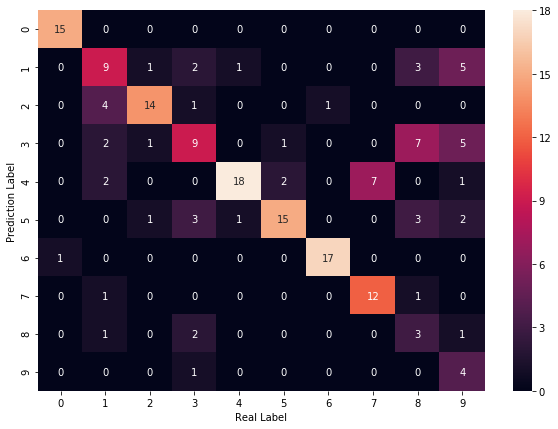

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[5] real:5
#1 min_error:2 index:[3] real:2
#2 min_error:1 index:[3] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:1 index:[2] real:1
#5 min_error:1 index:[4 7] real:7
#6 min_error:2 index:[6] real:6
#7 min_error:1 index:[3 5] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:2 index:[1 2 5] real:1
#10 min_error:2 index:[4 7] real:7
#11 min_error:2 index:[1] real:4
#12 min_error:1 index:[2] real:6
#13 min_error:1 index:[3] real:3
#14 min_error:1 index:[2] real:1
#15 min_error:2 index:[1 3 5 9] real:3
#16 min_error:1 index:[4] real:9
#17 min_error:2 index:[1 2] real:1
#18 min_error:1 index:[4 7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:1 index:[8] real:8
#21 min_error:1 index:[4] real:4
#22 min_error:1 index:[3] real:3
#23 min_error:2 index:[4 7] real:1
#24 min_error:0 index:[4] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:1 index:[6] real:6
#29 min_error:1 index:[1] real:

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.7043908472479901
Avg Base Learner:0.8867037724180582


In [16]:
from random import randint

list_acc = []

for iii in range(11):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.13333333333333333
Accuracy on training set: 0.2222222222222222
Accuracy on training set: 0.3
Accuracy on training set: 0.29444444444444445
Accuracy on training set: 0.3333333333333333
Accuracy on training set: 0.4388888888888889
Accuracy on training set: 0.45
Accuracy on training set: 0.5333333333333333
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.6
Accuracy on training set: 0.6277777777777778


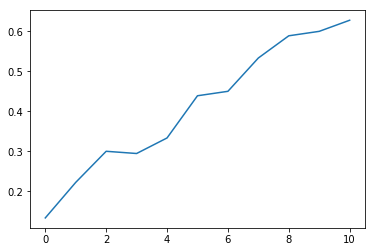

In [17]:
plt.plot(range(11),list_acc)
plt.show()

In [18]:
list_acc

[0.13333333333333333,
 0.2222222222222222,
 0.3,
 0.29444444444444445,
 0.3333333333333333,
 0.4388888888888889,
 0.45,
 0.5333333333333333,
 0.5888888888888889,
 0.6,
 0.6277777777777778]